Halil Hamscho
Tofik Hamscho

## C S 329E Term Project Proposal

# Yelp Dataset

Source: https://www.yelp.com/dataset


Project Description:

Research Goal/Question - What are the potentially hidden or underrated food spots in a city that I want to visit?


Dataset content: Using reviews and ratings from Yelp, focusing on lesser-known spots by filtering on review counts and ratings.

Data cleaning and preparation: Focusing on the desired city and limiting the analysis to businesses with low review counts but high ratings and other significant attributes

Learning Model: This will be addressed through clustering to find patterns in locations and ratings of lesser-known eateries or classification to identify whether a place is a hidden gem based on its attributes and reviews.

Expectations: Anticipate finding clusters of high-rated but not widely reviewed restaurants, potentially indicating hidden gems.

Evaluation: Since this is more exploratory, the evaluation might focus on the practicality and appeal of the identified spots. We could potentially validate findings with field tests (visiting some spots) or comparing to known popular spots.


In [69]:
# Import Libraries

# Our regular libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
%matplotlib inline

In [70]:
# Since the file is in the same directory as your notebook, just use the filename
file_path = 'yelp_academic_dataset_business.json'

# Load the data
business_data = pd.read_json(file_path, lines=True)

# Display the first few rows of the dataframe to confirm it's loaded correctly
print(business_data.head())

              business_id                      name  \
0  Pns2l4eNsfO8kk83dixA6A  Abby Rappoport, LAC, CMQ   
1  mpf3x-BjTdTEA3yCZrAYPw             The UPS Store   
2  tUFrWirKiKi_TAnsVWINQQ                    Target   
3  MTSW4McQd7CbVtyjqoe9mw        St Honore Pastries   
4  mWMc6_wTdE0EUBKIGXDVfA  Perkiomen Valley Brewery   

                           address           city state postal_code  \
0           1616 Chapala St, Ste 2  Santa Barbara    CA       93101   
1  87 Grasso Plaza Shopping Center         Affton    MO       63123   
2             5255 E Broadway Blvd         Tucson    AZ       85711   
3                      935 Race St   Philadelphia    PA       19107   
4                    101 Walnut St     Green Lane    PA       18054   

    latitude   longitude  stars  review_count  is_open  \
0  34.426679 -119.711197    5.0             7        0   
1  38.551126  -90.335695    3.0            15        1   
2  32.223236 -110.880452    3.5            22        0   
3  39.9555

Find what city has the most reviews

In [71]:
# Count the number of business entries per city
city_counts = business_data['city'].value_counts()

# Find the city with the most entries
top_cities = city_counts.head(10)

print(top_cities)


city
Philadelphia     14569
Tucson            9250
Tampa             9050
Indianapolis      7540
Nashville         6971
New Orleans       6209
Reno              5935
Edmonton          5054
Saint Louis       4827
Santa Barbara     3829
Name: count, dtype: int64


Will be choosing New Orleans because we are going to go ahead and visit it

Clean, Prepare and Filter Data

In [72]:
import pandas as pd

# Load the dataset
file_path = 'yelp_academic_dataset_business.json'
business_data = pd.read_json(file_path, lines=True)

# Filter for businesses in New Orleans, case-insensitive
new_orleans_businesses = business_data[
    (business_data['city'].str.lower() == 'new orleans') & (business_data['state'] == 'LA')
]

filtered_businesses = new_orleans_businesses

# Define a more comprehensive list of food-related categories
food_related_categories = [
    'restaurants', 'food', 'cafes', 'bakeries', 'bars', 'coffee & tea', 
    'ice cream & frozen yogurt', 'nightlife', 'breweries', 'pubs', 'wine bars',
    'sandwhiches', 'burgers'
]

# Further filter businesses based on categories, case-insensitive
filtered_businesses = filtered_businesses[
    filtered_businesses['categories'].str.lower().str.contains('|'.join(food_related_categories), na=False)
]

# Handle missing values in critical fields
filtered_businesses = filtered_businesses.dropna(subset=['stars', 'review_count'])

# Define hidden gems as highly rated but not widely reviewed
median_review_count = filtered_businesses['review_count'].median()
hidden_gems = filtered_businesses[
    (filtered_businesses['stars'] >= 4) & 
    (filtered_businesses['review_count'] < median_review_count)
]

# Display the prepared DataFrame
print(hidden_gems.head())


                business_id                             name  \
231  4IcB3QyMEA85UTWFKh9O9A      Eat Mah Taco @ Pal's Lounge   
321  GrzCVNDTRODqNez4zb4RLw            The Music Box Village   
324  IOZrqUQ2Jg6UeQ5CWpsmkg  Nesbit's Magazine Street Market   
385  vFJIK-z3QWs-3XNjs1hcZQ          New Orleans Jazz Market   
476  dk9zGFRJD2RXkHqAmFHOOA                     Garage Pizza   

                           address         city state postal_code   latitude  \
231                949 N Rendon St  New Orleans    LA       70119  29.976762   
321              4557 N Rampart St  New Orleans    LA       70117  29.963591   
324                301 Magazine St  New Orleans    LA       70130  29.950477   
385  1436 Oretha Castle Haley Blvd  New Orleans    LA       70113  29.941159   
476                  2828 Canal St  New Orleans    LA       70119  29.966814   

     longitude  stars  review_count  is_open  \
231 -90.086423    4.5             8        0   
321 -90.029257    5.0            22   

Will Implement Clustering as we will have to choose features that best represetn the characteristics of the businesses that could relate to being a hidden gem.

In [73]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Step 1: Feature extraction and preparation
features = hidden_gems[['stars', 'review_count']]
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Step 2: Clustering
kmeans = KMeans(n_clusters=8, random_state=123)
clusters = kmeans.fit_predict(features_scaled)

# Instead of hidden_gems['cluster'] = clusters
hidden_gems.loc[:, 'cluster'] = clusters


# Step 3: Evaluation
score = silhouette_score(features_scaled, clusters)
print('Silhouette Score:', score)


Silhouette Score: 0.6175330537895113


C:\Users\Halil Hamscho\AppData\Local\Temp\ipykernel_16484\2296610690.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hidden_gems.loc[:, 'cluster'] = clusters


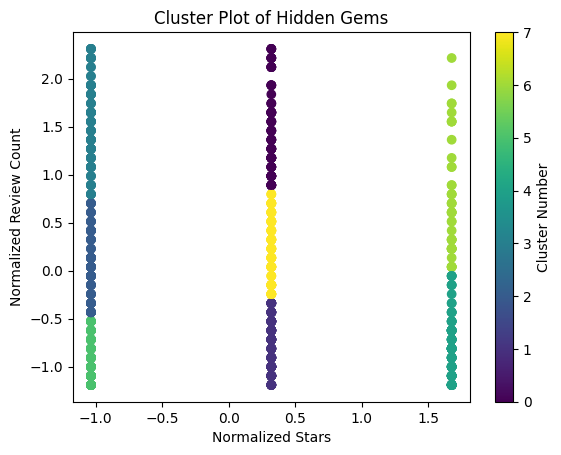

In [74]:
plt.scatter(features_scaled[:, 0], features_scaled[:, 1], c=clusters, cmap='viridis', label=clusters)
plt.xlabel('Normalized Stars')
plt.ylabel('Normalized Review Count')
plt.title('Cluster Plot of Hidden Gems')
plt.colorbar(label='Cluster Number')  # Adds a color bar to map colors to cluster numbers
plt.show()

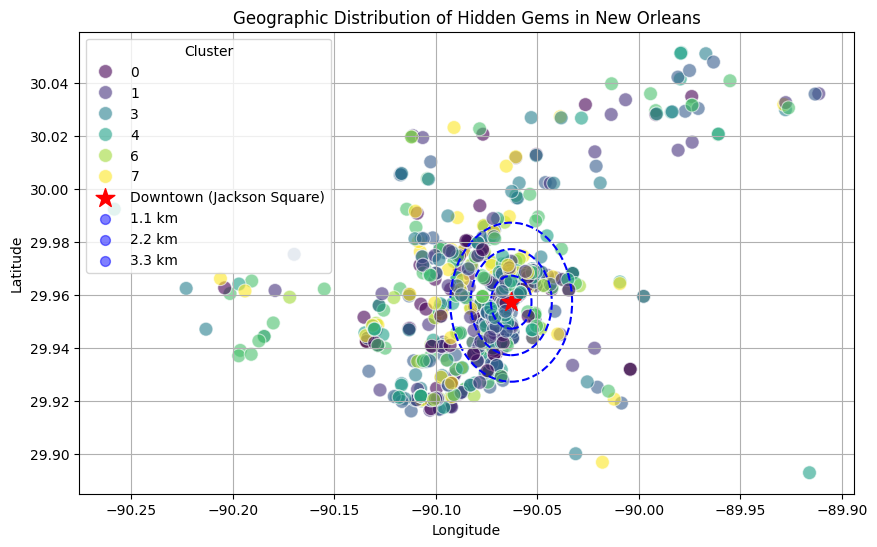

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Circle

# Coordinates for Jackson Square, the center of New Orleans
downtown_lat, downtown_lon = 29.9574, -90.0629

# Create a scatter plot of hidden gems with downtown marker
plt.figure(figsize=(10, 6))
ax = plt.gca()  # Get the current Axes instance on the current figure

# Plot the hidden gems
scatter = sns.scatterplot(data=hidden_gems, x='longitude', y='latitude', hue='cluster', palette='viridis', s=100, alpha=0.6)

# Add a marker for the downtown area
plt.scatter(downtown_lon, downtown_lat, color='red', s=200, label='Downtown (Jackson Square)', marker='*')

# Add circles for distance indicators
# Assuming each circle represents a fixed distance increment, e.g., 1 km
# Note: This is a simple approximation; for accurate distance calculation, consider using geospatial libraries
distances = [0.01, 0.02, 0.03]  # Approximate degrees for distances
for dist in distances:
    circle = Circle((downtown_lon, downtown_lat), dist, color='blue', fill=False, linestyle='--', linewidth=1.5)
    ax.add_patch(circle)
    plt.scatter([], [], c='blue', alpha=0.5, s=50, label=f'{dist*111:.1f} km')  # 111 km per degree latitude approximation

plt.title('Geographic Distribution of Hidden Gems in New Orleans')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

Now only do the top 3 for each cluster and sort by proximity to jackson square

In [76]:
# Define a function to calculate the haversine distance between two points
def haversine(lat1, lon1, lat2, lon2):
    # Radius of the Earth in kilometers
    R = 6371.0
    # Convert degrees to radians
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    # Difference in coordinates
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    # Haversine formula
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    distance = R * c
    return distance

# Calculate distances from Jackson Square
hidden_gems['distance'] = hidden_gems.apply(
    lambda x: haversine(downtown_lat, downtown_lon, x['latitude'], x['longitude']), axis=1
)

# Sort by distance within each cluster and select the top 3 closest businesses
top_3_per_cluster = hidden_gems.sort_values(by=['cluster', 'distance']).groupby('cluster').head(3)

# Display the results
print(top_3_per_cluster[['name', 'address', 'categories', 'stars', 'review_count', 'distance']]) 

                                    name                          address  \
80124          Rocket Fizz - New Orleans                   831 Decatur St   
735     De Ville Coffee House & Creperie                   508 Dumaine St   
103915                            QUEORK                  838 Chartres St   
30368     Creole Delicacies Gourmet Shop                 533 Saint Ann St   
4321                 Stanley Service Bar                    543 St Ann St   
51525               Pat O's On The River                   600 Decatur St   
116119                  The Sweet Palate                 519 St. Louis St   
61239     New Orleans Original Daiquiris                   633 Bourbon St   
76840             SLUSH Frozen Cocktails                   601 Bourbon St   
27326                         My Bar 635                   635 Bourbon St   
70188             Rick's Sporting Saloon                   522 Bourbon St   
59220               Petunia's Restaurant                 817 St. Louis St   

C:\Users\Halil Hamscho\AppData\Local\Temp\ipykernel_16484\1909724976.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hidden_gems['distance'] = hidden_gems.apply(


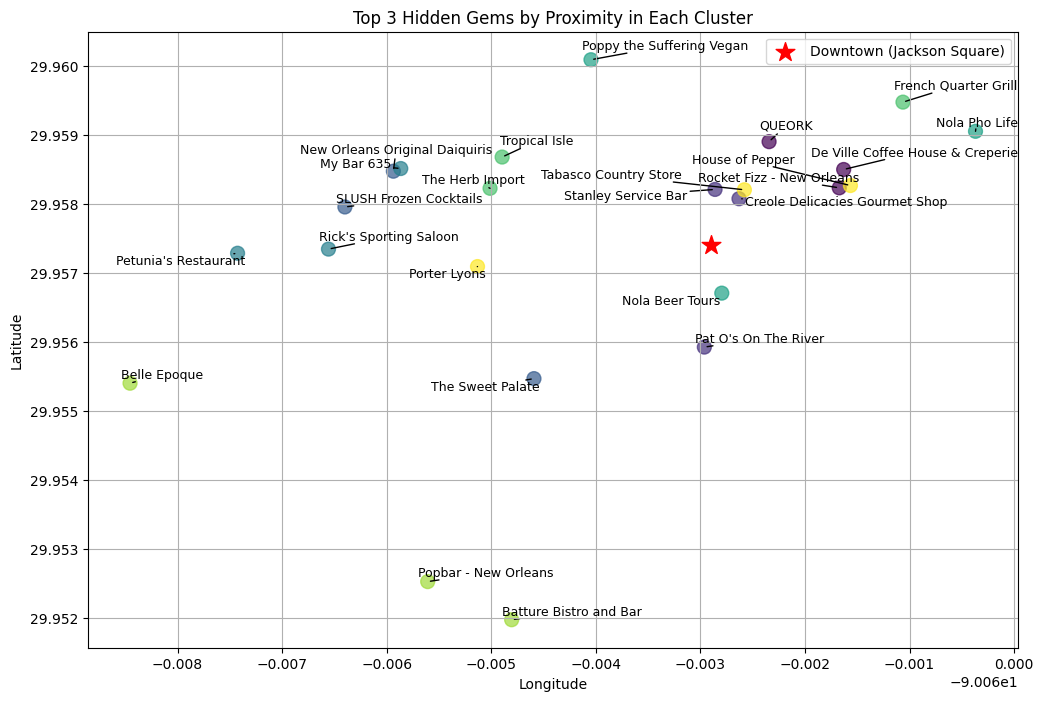

In [77]:
import matplotlib.pyplot as plt
from adjustText import adjust_text

# Coordinates for Jackson Square, the center of New Orleans
downtown_lat, downtown_lon = 29.9574, -90.0629

plt.figure(figsize=(12, 8))
plt.scatter(top_3_per_cluster['longitude'], top_3_per_cluster['latitude'], c=top_3_per_cluster['cluster'], cmap='viridis', s=100, alpha=0.7)
plt.scatter(downtown_lon, downtown_lat, color='red', s=200, marker='*', label='Downtown (Jackson Square)')

# Prepare annotations
texts = []
for i, point in top_3_per_cluster.iterrows():
    texts.append(plt.text(point['longitude'], point['latitude'], point['name'], fontsize=9, ha='right'))

# Use adjust_text to avoid text overlapping
adjust_text(texts, arrowprops=dict(arrowstyle='-', color='black'))

plt.title('Top 3 Hidden Gems by Proximity in Each Cluster')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.grid(True)
plt.show()

